# **Disease Diagnosis Project Proposal**

### **Set Up and Import Libraries**

In [40]:
import pandas as pd
import numpy as np
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

### **Download and Load the Dataset**

In [41]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Download the dataset
urllib.request.urlretrieve(url, "heart_disease_data.csv")

# Column names based on the dataset description
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load the dataset
df = pd.read_csv('heart_disease_data.csv', header=None, names=column_names)

# Display the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### **Data Preprocessing**

In [42]:
# Handle missing values (replace '?' with NaN, then fill missing values with mode or median)
df.replace('?', np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert categorical columns to numeric (if not already numeric)
label_encoder = LabelEncoder()

# Example of encoding a categorical column 'cp' (chest pain type)
df['cp'] = label_encoder.fit_transform(df['cp'])

# Encode other categorical columns similarly (sex, restecg, exang, etc.)
df['sex'] = label_encoder.fit_transform(df['sex'])
df['fbs'] = label_encoder.fit_transform(df['fbs'])
df['restecg'] = label_encoder.fit_transform(df['restecg'])
df['exang'] = label_encoder.fit_transform(df['exang'])
df['slope'] = label_encoder.fit_transform(df['slope'])
df['ca'] = df['ca'].replace('?', np.nan).astype(float)

# Encode 'target' as binary: 1 = heart disease, 0 = no heart disease
df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

# Check for null values after imputation
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### **Exploratory Data Analysis (EDA)**

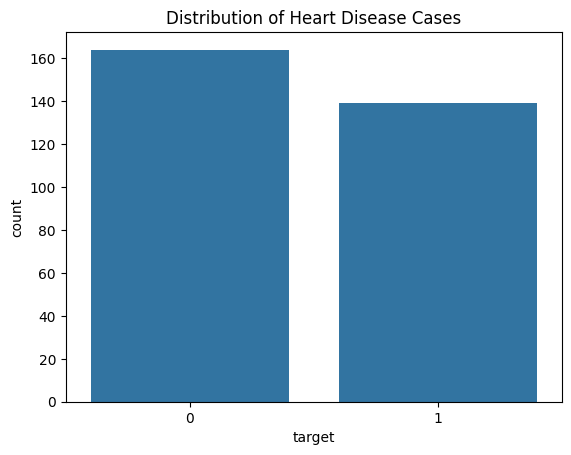

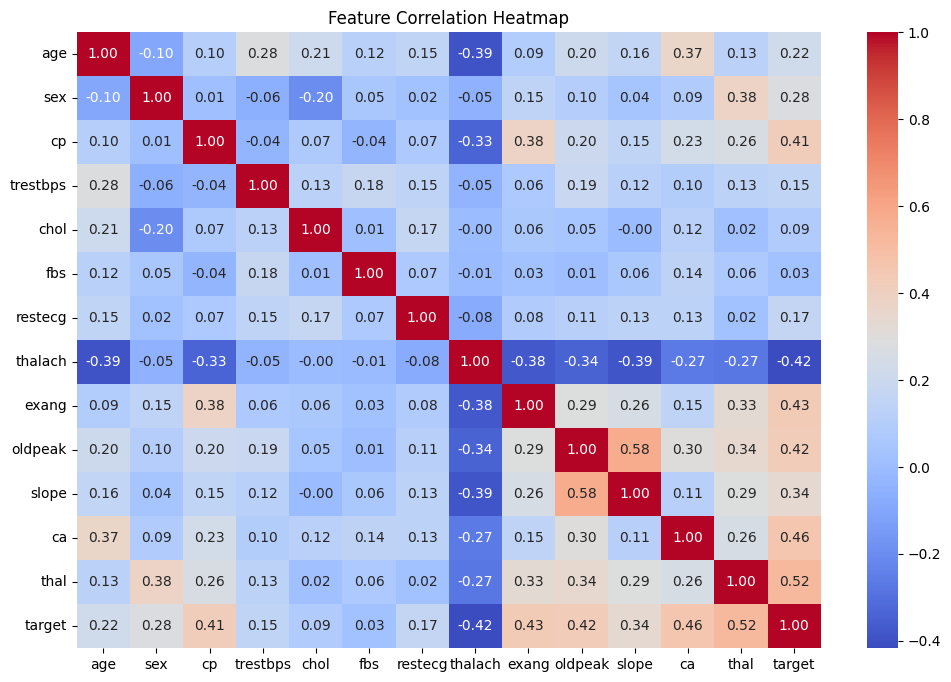

In [43]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Cases')
plt.show()

# Correlation heatmap to explore relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


### **Split the Data into Training and Testing Sets**

In [44]:
# Split data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (242, 13)
Testing data shape: (61, 13)


### **Train the Naïve Bayes Model**

In [45]:
# Initialize the Naïve Bayes model
model = GaussianNB()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the predictions
print(f"Predictions: {y_pred}")

Predictions: [1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0]


### **Evaluate the Model**

Confusion Matrix:
[[26  3]
 [ 7 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



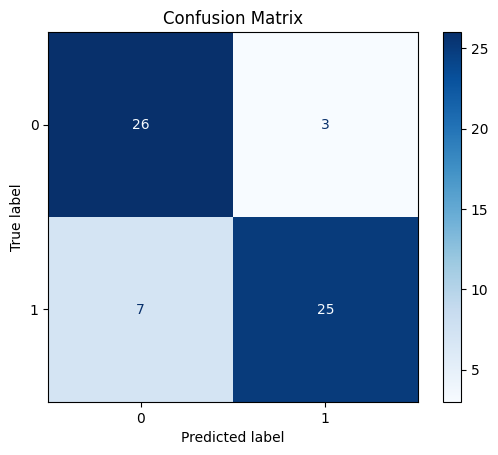

Accuracy: 0.84


In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Performance Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Accuracy Score
accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
print(f"Accuracy: {accuracy:.2f}")

### **Predict for New Data**

In [47]:
# Example: New patient data (values based on feature scale)
new_patient = np.array([[63, 1, 3, 145, 233, 1, 2, 150, 0, 2.3, 3, 0, 6]])  # Example features

# Predict if the new patient has heart disease (0 = no, 1 = yes)
prediction = model.predict(new_patient)
probability = model.predict_proba(new_patient)

print(f"Prediction: {prediction[0]} (0 = no disease, 1 = disease)")
print(f"Probability: {probability[0]}")

Prediction: 1 (0 = no disease, 1 = disease)
Probability: [0.02710901 0.97289099]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
